# Assignment 2 - Supervised Machine Learning Fundamentals
*Emma Mavis*  
egm28  
Worked with: Anas Mohammad, Sydney Donati-Leach

In [1]:
# Loading in necessary libraries
import numpy as np
import pandas as pd
from math import dist
from tabulate import tabulate
from scipy.stats import mode
import time
import random
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.colors import ListedColormap
import matplotlib.patches as mpatches
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.datasets import make_moons
from sklearn.metrics import r2_score, mean_squared_error


### Conceptual Questions on Supervised Learning

### 1.
1. When the sample size $n$ is extremely large and the number of predictors $p$ is small, we would generally expect the performance of a flexible statistical learning method to perform **worse** than an inflexible method. This is because with a large $n$, the variance will automatically be small and our method will therefore have higher bias. Less predictors also means less variation in the potential model parameters.  

2. When the number of predictors $p$ is extremey large, and the number of observations $n$ is small, we would generally expect the performance of a flexible statistical learning method to perform **better** than an inflexible method. This is because a small number of observations leads to higher variance in the data, which can be better captured by a more flexible model. The large number of predictors also offers more flexibility in the number of potential parameters.  

3. When the relationship between the predictors and response is highly non-linear, we would expect a flexible statistical learning method to be **better** than an inflexible one. A flexible method has higher variance than and inflexible one, which is more senstive to a non-linear pattern.

4. When the variance of the error terms is extremely high, we would generally expect a flexible statistical learning method to perfom **worse** than an infelxible method. This is because a flexible model would overfit to the high variation in the data, and would not perform well on unseen data.


### 2.
a. (i) This scenario is a regression problem because the outcome variable, CEO salary, is a continuous variable. (ii) We are most interested in inference, because the question is framed as how different variables *affect* salary, rather than predicting future salary values. (iii) $n = 500$ and $p = 3$.

b.  (i) This scenario is a classification problem because the outcome variable, success/failure, is a binary indicator. (ii) We are most interestd in prediction for this problem, because we want to primarily know if a product *will* be a success or a failure, and we are not concerned with the factors that influence that result. (iii) $n = 20$ and $p = 13$.

c. (i) This scenerio is a regression problem because the outcome variable, % change, is a continuous variable. (ii) The method of interest here is prediction, because the scenerio is framed as *predicting* the % change, rather than inferring how and why other global markets effect the U.S. dollar value. (iii) $n = 52$ and $p = 3$.

### Practical Questions

### 3. Classification Using KNN
a. Euclidean distance between each observation and the test point.

In [2]:
X = np.array(
    [[0, 3, 0], [2, 0, 0], [0, 1, 3], [0, 1, 2], [-1, 0, 1], [1, 1, 1]]
)
y = np.array(["r", "r", "r", "b", "b", "r"])
x_test = np.array([0, 0, 0])
distances = []
for point in X:
    distances.append(dist(point, x_test))
distances = ["{:.2f}".format(item) for item in distances]
distances = ["Euclidean\nDistance"] + distances
print(
    tabulate(
        [distances],
        headers=["Point", "1", "2", "3", "4", "5", "6"],
        tablefmt="fancy_grid",
    )
)


╒═══════════╤═════╤═════╤══════╤══════╤══════╤══════╕
│ Point     │   1 │   2 │    3 │    4 │    5 │    6 │
╞═══════════╪═════╪═════╪══════╪══════╪══════╪══════╡
│ Euclidean │   3 │   2 │ 3.16 │ 2.24 │ 1.41 │ 1.73 │
│ Distance  │     │     │      │      │      │      │
╘═══════════╧═════╧═════╧══════╧══════╧══════╧══════╛


b. When $K = 1$, our prediction for the test point is $\hat{y} = \text{blue}$, because the closest point is 5, which is blue.

c. When $K = 3$, our prediction for the test point is $\hat{y} = \text{red}$, because the closest three points are 2 (red), 5 (blue), and 6 (red). Since the majority are red, that is the color $\hat{y}$ is labelled as.

d. If the Bayes decision boundary is highly nonlinear, then we would expect the best value of $K$ to be small. A small  $K$ value leads to higher variance, which can capture a more complicated relationship than a high $K$ value.

### 4. Build Your Own Classification Algorithm

a. Binary KNN classifier

In [3]:
class Knn:
    # k-Nearest Neighbor class object for classification training and testing
    def __init__(self):
        self.x = []
        self.y = []

    def fit(self, x, y):
        # Save the training data to properties of this class
        self.x = x
        self.y = y

    def predict(self, x, k):
        y_hat = []  # Variable to store the estimated class label for
        # Calculate the distance from each vector in x to the training data
        for vector in x:
            distance = []
            for trained_vector in self.x:
                distance.append(dist(trained_vector, vector))
                pass
            k_sorted = np.argpartition(distance, k)[:k]
            y_hat.append(mode(self.y[k_sorted])[0])
        # Return the estimated targets
        return np.concatenate(y_hat, axis=0)


In [4]:
# Metric of overall classification accuracy
#  (a more general function, sklearn.metrics.accuracy_score, is also available)
def accuracy(y, y_hat):
    nvalues = len(y)
    accuracy = sum(y == y_hat) / nvalues
    return accuracy


b. Loading datasets

In [5]:
x_train_low = pd.read_csv(
    "https://raw.githubusercontent.com/kylebradbury/ids705/main/assignments/data/A2_X_train_low.csv",
    header=None,
).values
y_train_low = pd.read_csv(
    "https://raw.githubusercontent.com/kylebradbury/ids705/main/assignments/data/A2_y_train_low.csv",
    header=None,
).values
x_test_low = pd.read_csv(
    "https://raw.githubusercontent.com/kylebradbury/ids705/main/assignments/data/A2_X_test_low.csv",
    header=None,
).values
y_test_low = pd.read_csv(
    "https://raw.githubusercontent.com/kylebradbury/ids705/main/assignments/data/A2_y_test_low.csv",
    header=None,
).values
x_train_high = pd.read_csv(
    "https://raw.githubusercontent.com/kylebradbury/ids705/main/assignments/data/A2_X_train_high.csv",
    header=None,
).values
y_train_high = pd.read_csv(
    "https://raw.githubusercontent.com/kylebradbury/ids705/main/assignments/data/A2_y_train_high.csv",
    header=None,
).values
x_test_high = pd.read_csv(
    "https://raw.githubusercontent.com/kylebradbury/ids705/main/assignments/data/A2_X_test_high.csv",
    header=None,
).values
y_test_high = pd.read_csv(
    "https://raw.githubusercontent.com/kylebradbury/ids705/main/assignments/data/A2_y_test_high.csv",
    header=None,
).values


c. Training and classification evaluation

In [6]:
# Train and predict on low dimension
start_low = time.time()
knn_low = Knn()
knn_low.fit(x_train_low, y_train_low)
y_hat_low = knn_low.predict(x_test_low, 5)
end_low = time.time()

# Train and predict on high dimension
start_high = time.time()
knn_high = Knn()
knn_high.fit(x_train_high, y_train_high)
y_hat_high = knn_high.predict(x_test_high, 5)
end_high = time.time()


In [7]:
print(
    "Own KNN Classifier\n_________________________________________\nTime"
    " elapsed for low dimension prediction:"
    f" {(end_low - start_low):.2f} seconds\nTime elapsed for high"
    " dimension prediction:"
    f" {(end_high - start_high):.2f} seconds\nAccuracy of low dimension"
    f" prediction: {accuracy(y_test_low, y_hat_low)[0]*100}%\nAccuracy of"
    " high dimension prediction:"
    f" {accuracy(y_test_high, y_hat_high)[0]*100}%"
)


Own KNN Classifier
_________________________________________
Time elapsed for low dimension prediction: 2.21 seconds
Time elapsed for high dimension prediction: 14.15 seconds
Accuracy of low dimension prediction: 92.5%
Accuracy of high dimension prediction: 99.3%


d. Surprisingly, the accuracy of the scikit learn implementation is the same as our classifier for both the low and high dimension data sets. Not surprisingly, it is much faster than our classifier (as much as 150 times faster for the high-dimension data). See the below code.

In [8]:
start_l = time.time()
sk_low = KNeighborsClassifier(n_neighbors=5)
sk_low.fit(x_train_low, np.concatenate(y_train_low, axis=0))
sk_y_hat_low = sk_low.predict(x_test_low)
end_l = time.time()

start_h = time.time()
sk_high = KNeighborsClassifier(n_neighbors=5)
sk_high.fit(x_train_high, np.concatenate(y_train_high, axis=0))
sk_y_hat_high = sk_high.predict(x_test_high)
end_h = time.time()

acc_l = sk_low.score(x_test_low, y_test_low)
acc_h = sk_high.score(x_test_high, y_test_high)

print(
    "Scikit Learn KNN"
    " Classifier\n_________________________________________\nTime elapsed"
    f" for low dimension prediction: {(end_l - start_l):.2f} seconds\nTime"
    " elapsed for high dimension prediction:"
    f" {(end_h - start_h):.2f} seconds\nAccuracy of low dimension"
    f" prediction: {acc_l*100}%\nAccuracy of high dimension prediction:"
    f" {acc_h*100}%"
)


Scikit Learn KNN Classifier
_________________________________________
Time elapsed for low dimension prediction: 0.05 seconds
Time elapsed for high dimension prediction: 0.10 seconds
Accuracy of low dimension prediction: 92.5%
Accuracy of high dimension prediction: 99.3%


e. Any ML application that requires image processing I believe has detrimental effects when prediction generation is slow. For instance, image processing on a military drone when finding a location to drop a bomb. Any miscalculation or lag in the decision process has life or death effects for potential civilians.

### 5. Bias-Variance Tradeoff: Exploring the Tradeoff With a KNN Classifier

a. Create synthetic dataset

In [9]:
X_train, y_train = make_moons(n_samples=1000, noise=0.35)


b. Visualize data

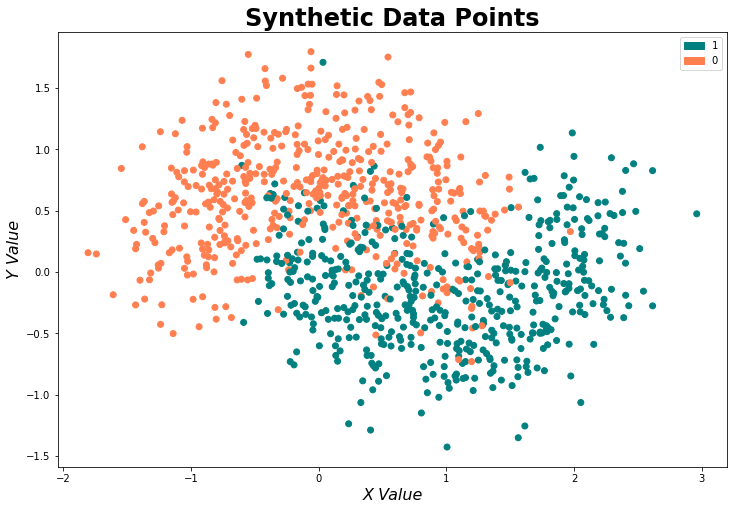

In [10]:
plt.figure(figsize=(12, 8))
colormap = np.array(["coral", "teal"])
plt.scatter(X_train[:, 0], X_train[:, 1], c=colormap[y_train])
one = mpatches.Patch(color="teal", label="1")
zero = mpatches.Patch(color="coral", label="0")
plt.legend(handles=[one, zero])
plt.title("Synthetic Data Points", fontsize=24, fontweight="bold")
plt.xlabel("X Value", fontsize=16, fontstyle="italic")
plt.ylabel("Y Value", fontsize=16, fontstyle="italic")
plt.show()


c. KNN on three subsets

In [11]:
# Combine X and y into dataframe to maintain labeling order
df = pd.DataFrame(dict(x1=X_train[:, 0], x2=X_train[:, 1], label=y_train))

# create three random samples of 100 values with replacement
sample1 = np.array(random.choices(df.values, k=100))
sample2 = np.array(random.choices(df.values, k=100))
sample3 = np.array(random.choices(df.values, k=100))

sample_list = [sample1, sample2, sample3]
k_list = [1, 25, 50]


d. Decision boundaries for each classifier on each sample

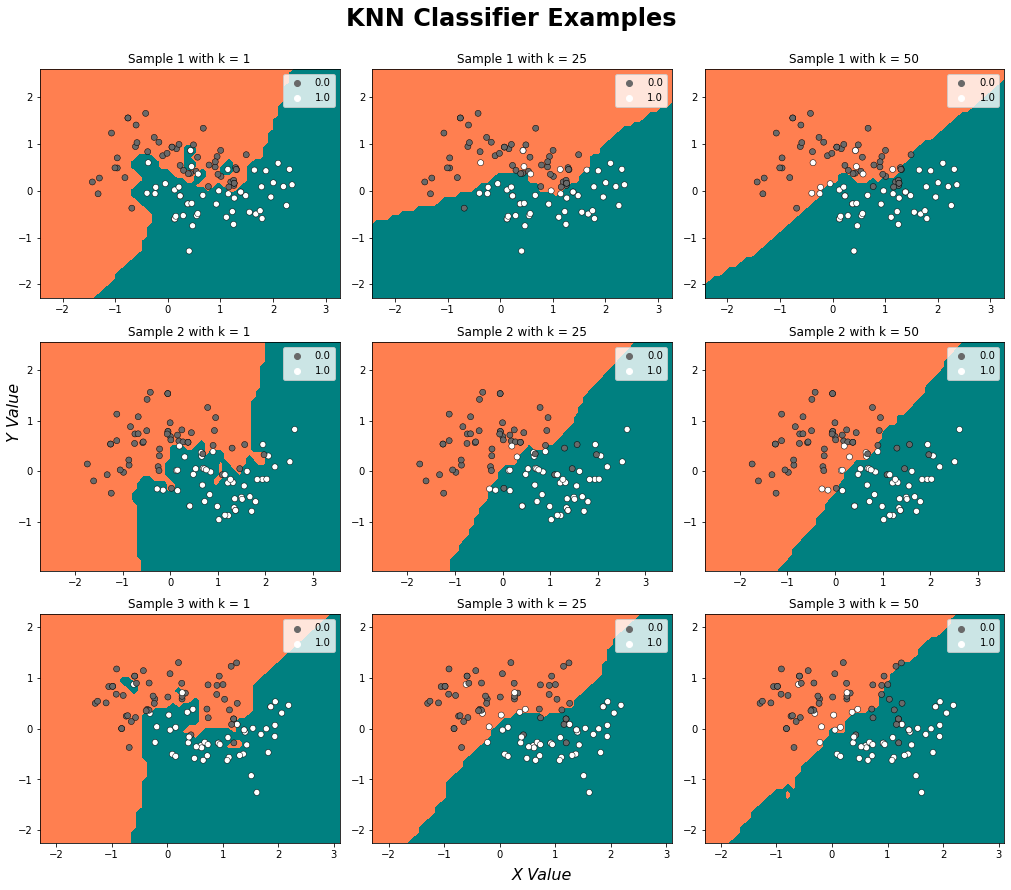

In [12]:
# step size in the meshgrid
h = 0.1
fig = plt.figure(figsize=(14, 12))
# color and font scheme
cmap_light = ListedColormap(["coral", "teal"])
cmap_bold = ["dimgray", "white"]
plt.suptitle(
    "KNN Classifier Examples", y=1, fontsize=24, fontweight="bold"
)
plt.figtext(
    0, 0.5, "Y Value", rotation=90, fontsize=16, fontstyle="italic"
)
plt.figtext(0.5, -0.01, "X Value", fontsize=16, fontstyle="italic")

# run through each of the nine combinations of sample and k
for n, sample in enumerate(sample_list):
    X = sample[:, 0:2]
    x0 = X[:, 0]
    x1 = X[:, 1]
    y = sample[:, 2]

    for i, k in enumerate(k_list):

        # create an instance of the classifier and fit the data
        knn = KNeighborsClassifier(n_neighbors=k)
        knn.fit(X, y)

        # define the plot boundaries and meshgrid (using pad of +/- 1)
        x0_min, x0_max = x0.min() - 1, x0.max() + 1
        x1_min, x1_max = x1.min() - 1, x1.max() + 1

        # create arrays to represent range on axes
        x0_axis_range = np.arange(x0_min, x0_max, h)
        x1_axis_range = np.arange(x1_min, x1_max, h)

        # create the meshgrid
        xx0, xx1 = np.meshgrid(x0_axis_range, x1_axis_range)
        Z = knn.predict(np.c_[xx0.ravel(), xx1.ravel()])

        # create the instance of subplot placement
        plt.subplot(3, 3, (3 * n + i + 1))

        # put result into color plot
        Z = Z.reshape(xx0.shape)
        plt.contourf(xx0, xx1, Z, cmap=cmap_light)

        # plot the training points
        sns.scatterplot(
            x=x0,
            y=x1,
            hue=y,
            palette=cmap_bold,
            alpha=1.0,
            edgecolor="black",
        )
        plt.xlim(xx0.min(), xx0.max())
        plt.ylim(xx1.min(), xx1.max())
        plt.title(f"Sample {n+1} with k = {k}")

fig.tight_layout()


e. As $k$ increases, the decision boundary between the two classes becomes less flexible. The $k = 1$ boundary appears to best capture the distinction between the two classes, since the lowest $k$ value will yield the most flexible decision boundary. But this value of $k$ also leads to the most variation across samples, which means it will not be a good classifier in general.

f. As $k$ increases, the amount of variance in the decision boundary decreases, as shown in the columns in the above figure. This also means that the right-most column with $k = 50$ has the largest bias - the systematic error that was learned in the training process leads to the decision boundary not capturing the nuances of unseen data. Conversely, the $k = 1$ column displays low bias and high variance - the nuances and patterns of variation in the training are captured too closely, which will incorrectly predict on unseen data. We can see that the middle column of $k = 25$ strikes a balance between the two.

### 6. Bias-Variance Tradeoff II: Quantifying the Tradeoff

a. Create test data

In [13]:
X_test, y_test = make_moons(1000, noise=0.35)


b. Train KNN for $k = 1, 2,...,500$ for train and test data, plot classification error

In [14]:
k_values = list(range(1, 501))
train_scores = []
test_scores = []
for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    train_scores.append(1 - knn.score(X_train, y_train))
    test_scores.append(1 - knn.score(X_test, y_test))

train_scores = [100 * x for x in train_scores]
test_scores = [100 * x for x in test_scores]


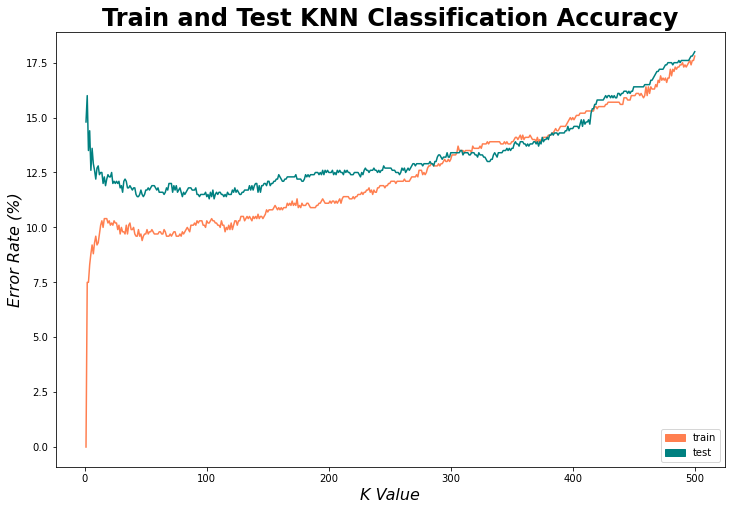

In [15]:
plt.figure(figsize=(12, 8))
plt.plot(k_values, train_scores, color="coral")
plt.plot(k_values, test_scores, color="teal")
plt.title(
    "Train and Test KNN Classification Accuracy",
    fontsize=24,
    fontweight="bold",
)
plt.xlabel("K Value", fontsize=16, fontstyle="italic")
plt.ylabel("Error Rate (%)", fontsize=16, fontstyle="italic")
train = mpatches.Patch(color="coral", label="train")
test = mpatches.Patch(color="teal", label="test")
plt.legend(handles=[train, test], loc="lower right")
plt.show()


c. When $k$ is low, about 20 or less, the error rate is very low in the training data and very high in the testing data. This is because a low $k$ leads to more variance, which closely captures trends in training data and poorly captures trends in test data that is different from training data. After that threshold, the testing error starts to steadily decrease, and the training error starts to steadily increase. After the training error reaches a local maximum and the testing error reaches a local minimum, around $k = 30$, they both slowly increase until $k$ is about 350, and then the slope increases once more until $k = 500$.

d. Low values of $k$ represent high variance and high values of $k$ represent high bias.

e. The optimal value of $k$ will be the moment when the testing error rate is at its lowest.

In [16]:
print(
    "The optimal value of k in this instance is"
    f" {k_values[test_scores.index(min(test_scores))]}"
)


The optimal value of k in this instance is 102


f. Because hyperparameters are used to adjust model performance, these are what control the flexibility of a model, like the $k$ in KNN. Other examples would be the learning rate in a neural network, the number of branches in a decision tree, and non-linear transformations in a linear regression.

### 7. Linear Regression and Nonlinear Transformations

In [17]:
train = pd.read_csv(
    "https://raw.githubusercontent.com/kylebradbury/ids705/main/assignments/data/A2_Q7_train.csv"
)
test = pd.read_csv(
    "https://raw.githubusercontent.com/kylebradbury/ids705/main/assignments/data/A2_Q7_test.csv"
)

x_train = train.x.values[:, np.newaxis]
y_train = train.y.values

x_test = test.x.values[:, np.newaxis]
y_test = test.y.values


a. Scatterplot of training data

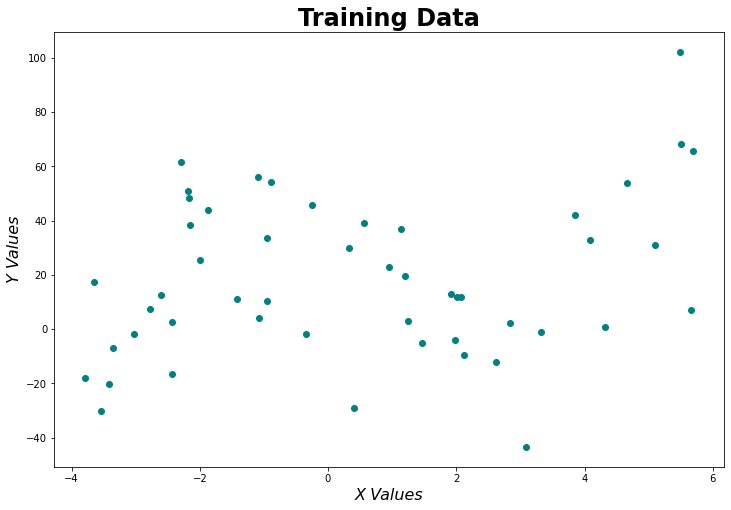

In [27]:
plt.figure(figsize=(12, 8))
plt.scatter(x_train, y_train, color="teal")
plt.title("Training Data", fontsize=24, fontweight="bold")
plt.xlabel("X Values", fontsize=16, fontstyle="italic")
plt.ylabel("Y Values", fontsize=16, fontstyle="italic")
plt.show()


b. Linear Regression Model Estimation

In [19]:
# must sort the arrays based on ascending x values for plotting purposes in part d
y_train = y_train[x_train[:, 0].argsort()]
x_train = x_train[x_train[:, 0].argsort()]


In [20]:
reg1 = LinearRegression()
reg1.fit(x_train, y_train)
# print(reg1.coef_)
# print(reg1.intercept_)
y_hat1 = reg1.predict(x_train)
r2_1 = r2_score(y_train, y_hat1)
mse1 = mean_squared_error(y_train, y_hat1)
print(
    f"The R-squared value for this model is {r2_1*100:.2f}% and the mean"
    f" squared error is {mse1:.2f}. The model can be represented by the"
    " following equation:"
)


The R-squared value for this model is 6.49% and the mean squared error is 791.42. The model can be represented by the following equation:


$$\hat{y}_i = 17.20 + 2.59x_i$$

c. Transform $x$ to be third-degree polynomial and fit a second model

In [21]:
x_train2 = x_train ** 2
x_train3 = x_train ** 3
x_train_matrix = np.concatenate((x_train, x_train2, x_train3), axis=1)
reg2 = LinearRegression()
reg2.fit(x_train_matrix, y_train)
reg2.coef_
reg2.intercept_
y_hat2 = reg2.predict(x_train_matrix)
r2_2 = r2_score(y_train, y_hat2)
mse2 = mean_squared_error(y_train, y_hat2)
print(
    f"The R-squared value for this model is {r2_2*100:.2f}% and the mean"
    f" squared error is {mse2:.2f}. This model can be represented by the"
    " following equation:"
)


The R-squared value for this model is 39.63% and the mean squared error is 510.88. This model can be represented by the following equation:


$$\hat{y}_i = 24.16 - 9.25x - 2.13x^2 + 0.90x^3$$

d. Model visualizations

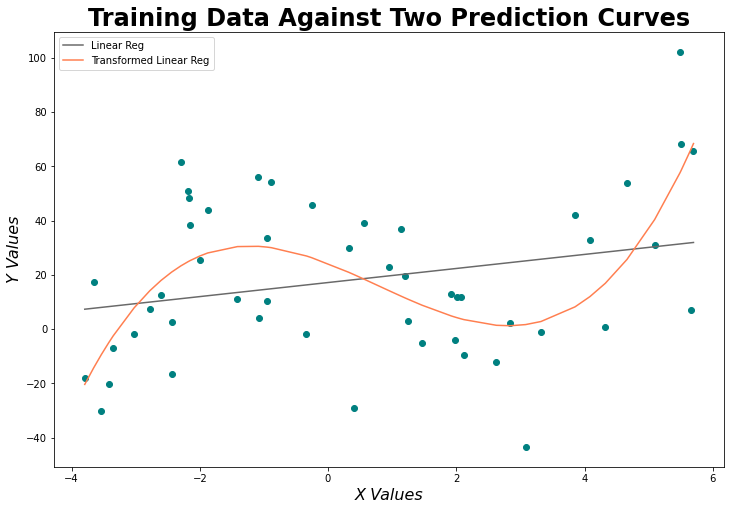

In [22]:
plt.figure(figsize=(12, 8))
plt.scatter(x_train, y_train, color="teal")
plt.plot(x_train, y_hat1, color="dimgray", label="Linear Reg")
plt.plot(x_train, y_hat2, color="coral", label="Transformed Linear Reg")
plt.title(
    "Training Data Against Two Prediction Curves",
    fontsize=24,
    fontweight="bold",
)
plt.xlabel("X Values", fontsize=16, fontstyle="italic")
plt.ylabel("Y Values", fontsize=16, fontstyle="italic")
plt.legend()
plt.show()


e. Compare models and evaluate performance on test data

In [25]:
# create matrix of testing values for polynomial regression
x_test2 = x_test ** 2
x_test3 = x_test ** 3
x_test_matrix = np.concatenate((x_test, x_test2, x_test3), axis=1)

y_pred1 = reg1.predict(x_test)
y_pred2 = reg2.predict(x_test_matrix)
r2_test1 = r2_score(y_test, y_pred1)
r2_test2 = r2_score(y_test, y_pred2)
mse_test1 = mean_squared_error(y_test, y_pred1)
mse_test2 = mean_squared_error(y_test, y_pred2)

print(
    "            Linear Regression Performance | R-squared:"
    f" {r2_test1*100:.2f}%, MSE: {mse_test1:.2f}"
)
print(
    "Transformed Linear Regression Performance | R-squared:"
    f" {r2_test2*100:.2f}%, MSE: {mse_test2:.2f}"
)


            Linear Regression Performance | R-squared: -13.29%, MSE: 1116.66
Transformed Linear Regression Performance | R-squared: 22.95%, MSE: 759.50


f. The transfored linear regression model (reg2) performed the best on both the training data and the test data. This is because both data sets are highly non-linear (as seen in the scatter plot in part a and the scatter plot below of the test data). The second model captures the training data's curved behavior quite well, as seen in the plot from part d, and even though does not closely match the curved behavior in the testing data, it is a better match than the first model. The first model is a positive line, which as reflected in it's R-squared value, captures almost an opposite trend than what's seen in the testing data.

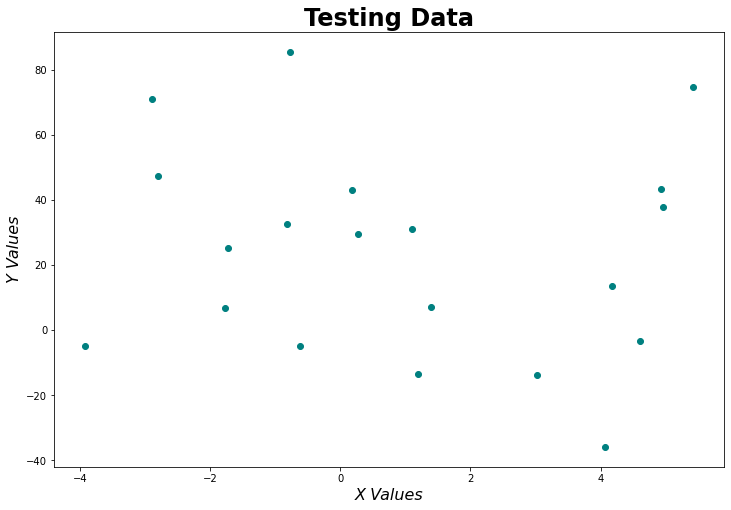

In [24]:
plt.figure(figsize=(12, 8))
plt.scatter(x_test, y_test, color="teal")
plt.title("Testing Data", fontsize=24, fontweight="bold")
plt.xlabel("X Values", fontsize=16, fontstyle="italic")
plt.ylabel("Y Values", fontsize=16, fontstyle="italic")
plt.show()


g. If the testing data were significantly different than the training data, the predictive capability of both models would suffer greatly. They both capture an increasing trend in $y$, so any data that does not vaguely follow that pattern will not be modelled well by these equations. Because of this possibility, the accuracy of generalization performance would also be negatively impacted.